In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset
df = pd.read_csv('Traffic_data2.csv')

# Select relevant columns from the dataset
columns = ['duration(minutes)', 'MS407', 'MS423', 'Weekday', 'Rush_hour', 'W+R2', 'min_max', 'logMS407', 'logMS423', 'diff']
df = df[columns]

# Print the initial DataFrame to check its contents
print(df)

# Drop rows with any missing values
df = df.dropna()

# Display summary statistics of the DataFrame
df.describe()

      duration(minutes)  MS407   MS423  Weekday  Rush_hour  W+R2  min_max  \
0                   4.0  193.0   146.0      1.0        0.0   0.0      3.0   
1                   4.0  126.0    97.0      1.0        0.0   0.0      3.0   
2                   4.0  136.0   101.0      1.0        0.0   0.0      3.0   
3                   4.0  280.0   248.0      1.0        0.0   0.0      4.0   
4                   4.0  657.0   735.0      1.0        0.0   0.0      4.0   
...                 ...    ...     ...      ...        ...   ...      ...   
1844                5.0  937.0  1160.0      0.0        2.0   0.0      6.0   
1845                6.0  939.0  1119.0      0.0        0.0   0.0      6.0   
1846                6.0  934.0  1113.0      0.0        0.0   0.0      6.0   
1847                6.0  881.0   994.0      0.0        0.0   0.0      6.0   
1848                NaN    NaN     NaN      NaN        NaN   NaN      NaN   

      logMS407  logMS423  diff  
0     2.285557  2.164353   0.0  
1     2.1

,duration(minutes),MS407,MS423,Weekday,Rush_hour,W+R2,min_max,logMS407,logMS423,diff
count,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000
mean,6.288420,769.334957,838.548701,0.728896,0.472403,0.346320,6.872835,2.820153,2.837602,0.001082
std,2.039044,319.229083,380.961711,0.444650,0.771933,0.694302,2.920265,0.283026,0.332203,0.999187
min,4.000000,10.000000,7.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.845098,-4.000000
25%,4.000000,512.500000,520.000000,0.000000,0.000000,0.000000,4.000000,2.709693,2.716003,0.000000
50%,6.000000,924.000000,1000.000000,1.000000,0.000000,0.000000,7.000000,2.965672,3.000000,0.000000
75%,8.000000,1013.000000,1144.000000,1.000000,1.000000,0.000000,9.000000,3.005609,3.058426,1.000000
max,12.000000,1365.000000,1520.000000,1.000000,2.000000,2.000000,14.000000,3.135133,3.181844,4.000000


In [6]:
# Select features (independent variables) and target variable (dependent variable)
x = df[['MS423', 'MS407', 'Weekday', 'W+R2']]  
y = df['duration(minutes)']  

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize and configure the Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=8, min_samples_split=6, min_samples_leaf=3)

# Train the Decision Tree Regressor model on the training data
dt_reg.fit(x_train, y_train)

# Predict the target variable on the test and training datasets
y_pred = dt_reg.predict(x_test)  
y_pred2 = dt_reg.predict(x_train)  

# Calculate R-squared score for both training and testing predictions
r2_train = r2_score(y_train, y_pred2)
r2_test = r2_score(y_test, y_pred)

# Print R-squared values for both training and testing data
print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)

# Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print MAE and MAPE values
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Print feature importances as determined by the Decision Tree model
print(dt_reg.feature_importances_)

R-squared (Training): 0.8226046709542205
R-squared (Testing): 0.7365487373413239
Mean Absolute Error: 0.687589811067526
Mean Absolute Percentage Error: 0.09747188958972766
[0.10120548 0.6777577  0.12985702 0.0911798 ]


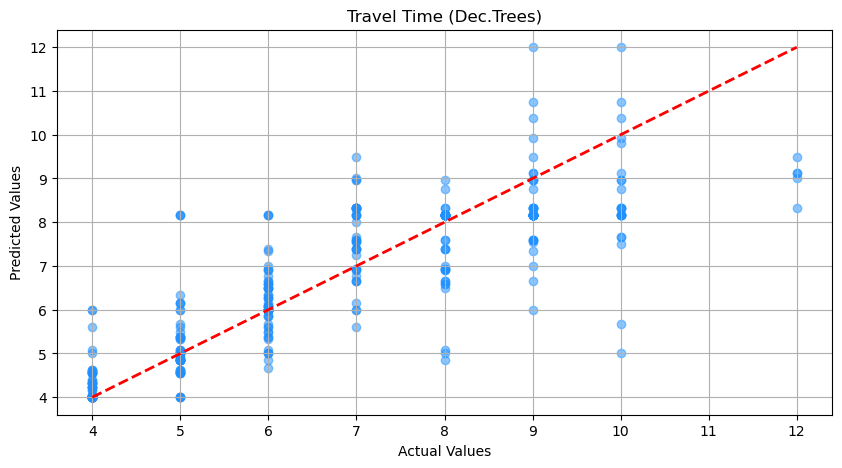

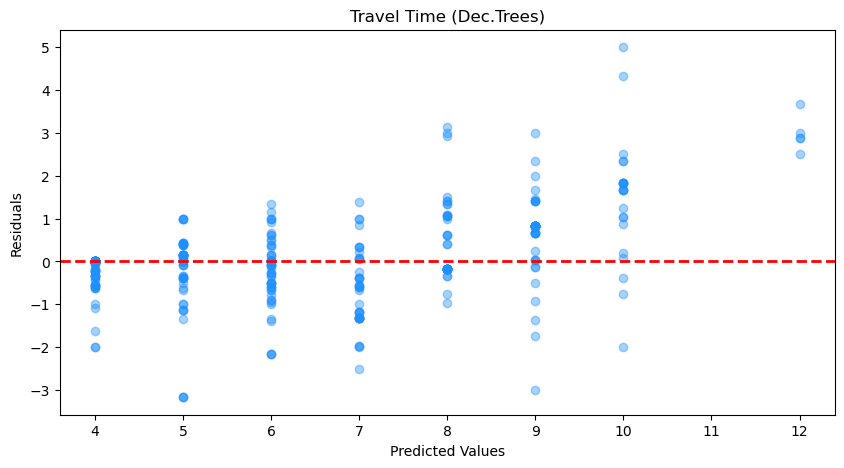

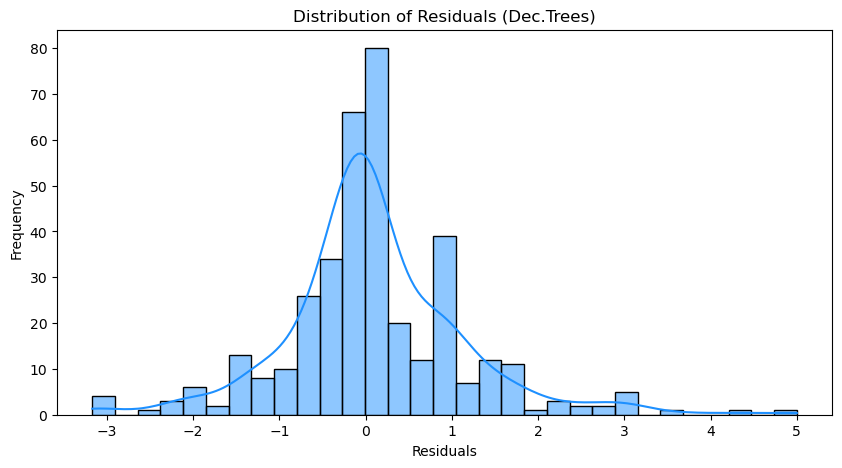

In [7]:
import matplotlib.pyplot as plt
y_pred = dt_reg.predict(x_test)

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Diagonal line
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Travel Time (Dec.Trees)")

plt.savefig('scatter_plot_TTDEctrees.png')
plt.show()

# Calculate residuals
residuals = y_test - y_pred
# Create a residual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, color='dodgerblue', alpha=0.4, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Travel Time (Dec.Trees)")
plt.savefig('residual_plot_TTDEctrees.png')
plt.show()

import seaborn as sns
# Calculate residuals
residuals = y_test - y_pred
# Create a histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='dodgerblue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Dec.Trees)")
plt.savefig('dist_plot_TTDEctrees.png')
plt.show()


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=2)
gbr.fit(x_train, y_train)

# Predict on the test and training sets
y_pred3 = gbr.predict(x_test)
y_pred4 = gbr.predict(x_train)

# Calculate R-squared scores for both training and testing sets
r2_train = r2_score(y_train, y_pred4)
r2_test = r2_score(y_test, y_pred3)

print("R-squared (Training):", r2_train)
print("R-squared (Testing):", r2_test)

# Calculate Mean Absolute Error and Mean Absolute Percentage Error for the test set
mae2 = mean_absolute_error(y_test, y_pred)
mape2 = mean_absolute_percentage_error(y_test, y_pred)

print('Mean Absolute Error:', mae2)
print('Mean Absolute Percentage Error:', mape2)

# Print feature importances from the trained model
print(gbr.feature_importances_)

R-squared (Training): 0.7636831362377928
R-squared (Testing): 0.7389364664810454
Mean Absolute Error: 0.687589811067526
Mean Absolute Percentage Error: 0.09747188958972766
[0.09423976 0.68540438 0.10176271 0.11859315]


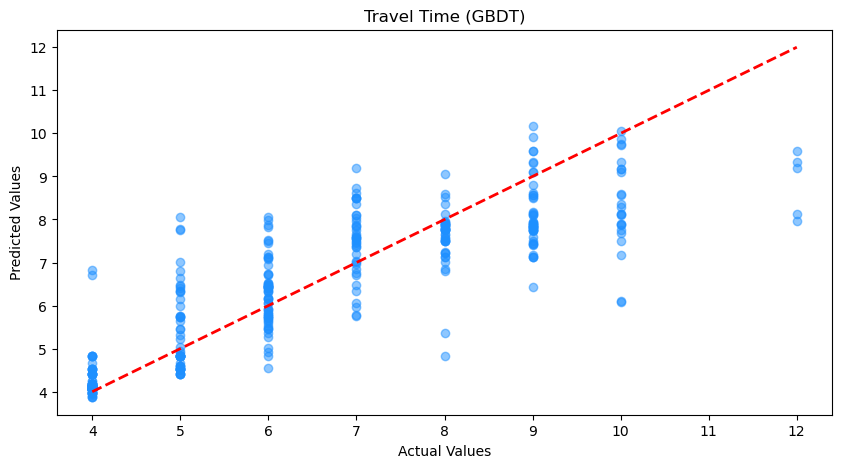

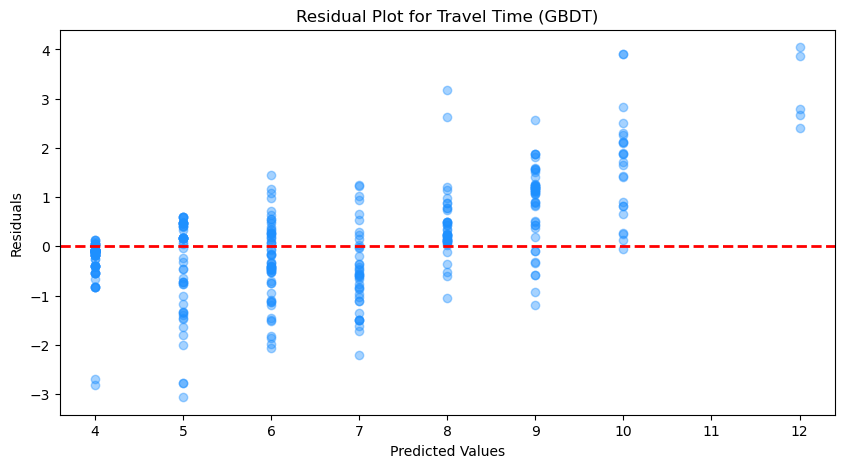

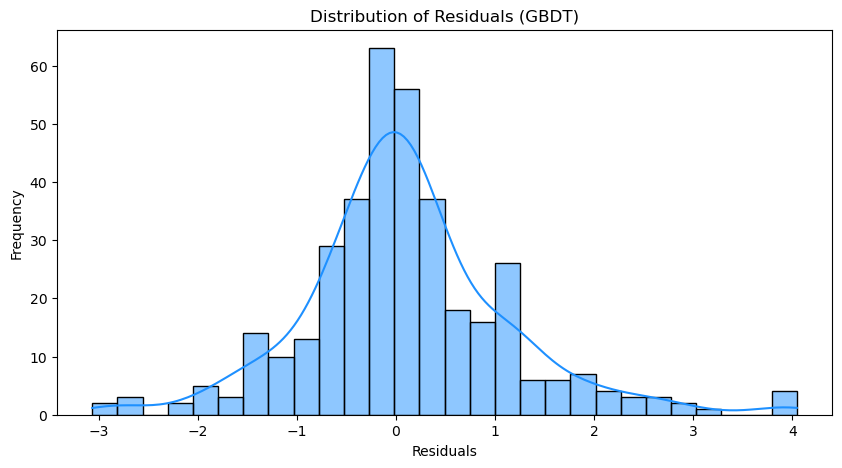

In [10]:
# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred3, color='dodgerblue', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Travel Time (GBDT)')

plt.savefig('scatter_plot_TTGBDT.png')
plt.show()

# Calculate residuals
residuals = y_test - y_pred3
# Create a residual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, color='dodgerblue', alpha=0.4, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Travel Time (GBDT)")
plt.savefig('residual_plot_TTGBDT.png')
plt.show()

# Calculate residuals
residuals = y_test - y_pred3
# Create a histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='dodgerblue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (GBDT)")
plt.savefig('distribution_plot_TTGBDT.png')
plt.show()


In [17]:
import pandas as pd
import numpy as np
from scipy.optimize import least_squares
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Define the BPR (Bureau of Public Roads) function
def bpr_function(Q, a, b, T0, C):

    return T0 * (1 + a * (Q / C)**b)

# Define the objective function for optimization
def objective_function(params, Q_obs, T_obs, T0, C):

    a, b = params
    predictions = bpr_function(Q_obs, a, b, T0, C)
    return T_obs - predictions  # Residuals to minimize

# Load and prepare the data
df = pd.read_csv('Traffic_data2.csv')  
df.drop(df.index[-1], inplace=True)

# Extract traffic flow and travel time from the DataFrame
Q_data = df['avg_traffic'].values  # Traffic flow
T_data = df['duration(minutes)'].values  # Travel time

# Initial guesses for parameters 'a' and 'b'
initial_a = 0.15
initial_b = 4

# Travel time and traffic capacity constants
T0 = 4
C = 1100

# Perform parameter calibration using least squares optimization
initial_guess = [initial_a, initial_b]  # Initial guesses for 'a' and 'b'
result = least_squares(objective_function, initial_guess, args=(Q_data, T_data, T0, C))

# Extract and print the calibrated parameters
a_calibrated, b_calibrated = result.x
print("Calibrated 'a':", a_calibrated)
print("Calibrated 'b':", b_calibrated)

# Predict travel times using the calibrated parameters
T_predicted = bpr_function(Q_data, a_calibrated, b_calibrated, T0, C)

# Convert observed and predicted travel times to numpy arrays for further processing
T_data = np.array(T_data)
T_predicted = np.array(T_predicted)

# Combine observed and predicted travel times into a DataFrame for comparison
result_df = pd.DataFrame({'Observed Travel Times': T_data, 'Predicted Travel Times': T_predicted})
print(result_df)  # Display the DataFrame

# Calculate and print error metrics to evaluate the model's performance
mae = mean_absolute_error(T_data, T_predicted)  # Mean Absolute Error
mse = mean_squared_error(T_data, T_predicted)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = mean_absolute_percentage_error(T_data, T_predicted)  # Mean Absolute Percentage Error
r_squared = r2_score(T_data, T_predicted)  # R-squared (Coefficient of Determination)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r_squared)


Calibrated 'a': 0.896209019629904
Calibrated 'b': 1.7492720205684944
      Observed Travel Times  Predicted Travel Times
0                       4.0                4.136041
1                       4.0                4.065386
2                       4.0                4.072735
3                       4.0                4.295318
4                       4.0                5.609693
...                     ...                     ...
1843                    5.0                6.753527
1844                    5.0                7.296416
1845                    6.0                7.189922
1846                    6.0                7.160157
1847                    6.0                6.710394

[1848 rows x 2 columns]
Mean Absolute Error (MAE): 1.0832179221591538
Mean Squared Error (MSE): 2.1562954932251484
Root Mean Squared Error (RMSE): 1.468433006039141
Mean Absolute Percentage Error (MAPE): 0.16780825922673834
R-squared (R2): 0.4810922213867601


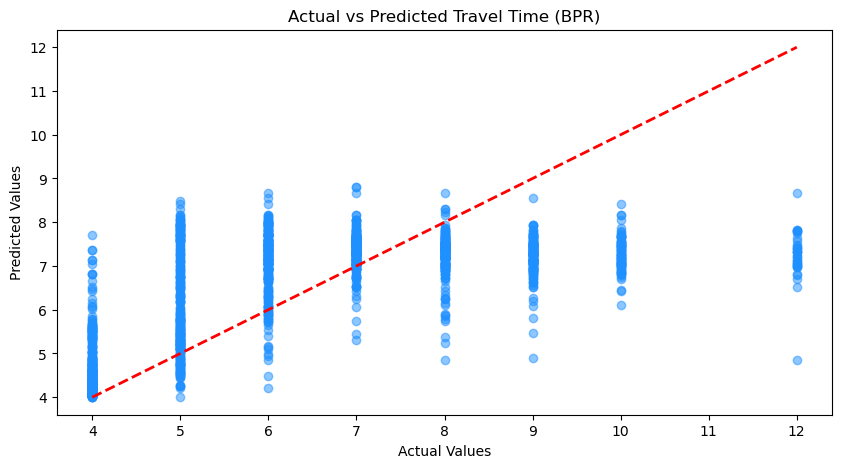

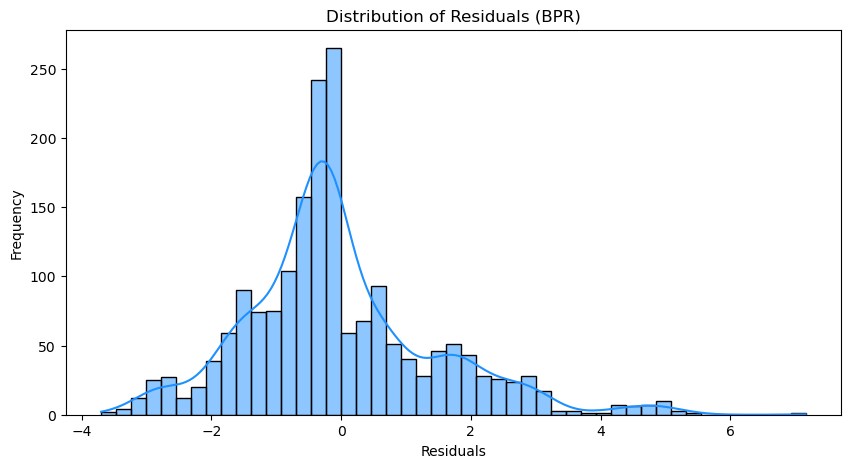

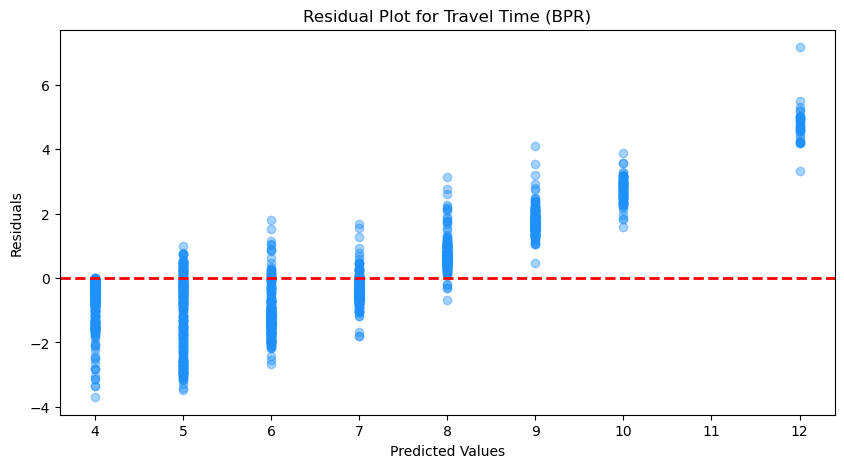

In [12]:
# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(T_data, T_predicted, color='dodgerblue', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(T_data), max(T_data)], [min(T_data), max(T_data)], color='red', linestyle='--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Travel Time (BPR)")
plt.savefig('scatter_plot_BPR.png')
plt.show()

# Calculate residuals
residuals = T_data - T_predicted
# Create a histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='dodgerblue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (BPR)")
plt.savefig('histogram_BPR.png')
plt.show()

# Create a residual plot
plt.figure(figsize=(10, 5))
plt.scatter(T_data, residuals, color='dodgerblue', alpha=0.4, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Travel Time (BPR)")
plt.savefig('residual_plot_BPR.png')
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Predict travel times using the calibrated parameters from the BPR function
T_predicted = bpr_function(x_test.iloc[:, 0].values, a_calibrated, b_calibrated, T0, C)

# Combine the BPR model predictions and Decision Tree model predictions
combined_predictions_dt = (0.5 * T_predicted) + (0.5 * y_pred)

# Calculate and print error metrics for the combined model with Decision Tree
mae_combined_dt = mean_absolute_error(y_test, combined_predictions_dt)  # Mean Absolute Error
mape_combined_dt = mean_absolute_percentage_error(y_test, combined_predictions_dt)  # Mean Absolute Percentage Error
r2_combined_dt = r2_score(y_test, combined_predictions_dt)  # R-squared

print("Mean Absolute Error (MAE) for Decision Tree Combination:", mae_combined_dt)
print("Mean Absolute Percentage Error (MAPE) for Decision Tree Combination:", mape_combined_dt)
print("R-squared (R2) for Decision Tree Combination:", r2_combined_dt)

# Combine the BPR model predictions and Gradient Boosting model predictions
combined_predictions_gbr = (0.5 * T_predicted) + (0.5 * y_pred3)

# Calculate and print error metrics for the combined model with Gradient Boosting
mae_combined_gbr = mean_absolute_error(y_test, combined_predictions_gbr)  # Mean Absolute Error
mape_combined_gbr = mean_absolute_percentage_error(y_test, combined_predictions_gbr)  # Mean Absolute Percentage Error
r2_combined_gbr = r2_score(y_test, combined_predictions_gbr)  # R-squared

print("Mean Absolute Error (MAE) for Gradient Boosting Combination:", mae_combined_gbr)
print("Mean Absolute Percentage Error (MAPE) for Gradient Boosting Combination:", mape_combined_gbr)
print("R-squared (R2) for Gradient Boosting Combination:", r2_combined_gbr)


Mean Absolute Error (MAE) for Decision Tree Combination: 0.8557237028084277
Mean Absolute Percentage Error (MAPE) for Decision Tree Combination: 0.12829495843230293
R-squared (R2) for Decision Tree Combination: 0.6844036535931828
Mean Absolute Error (MAE) for Gradient Boosting Combination: 0.8916218144820501
Mean Absolute Percentage Error (MAPE) for Gradient Boosting Combination: 0.13416598910826621
R-squared (R2) for Gradient Boosting Combination: 0.6612622179290266


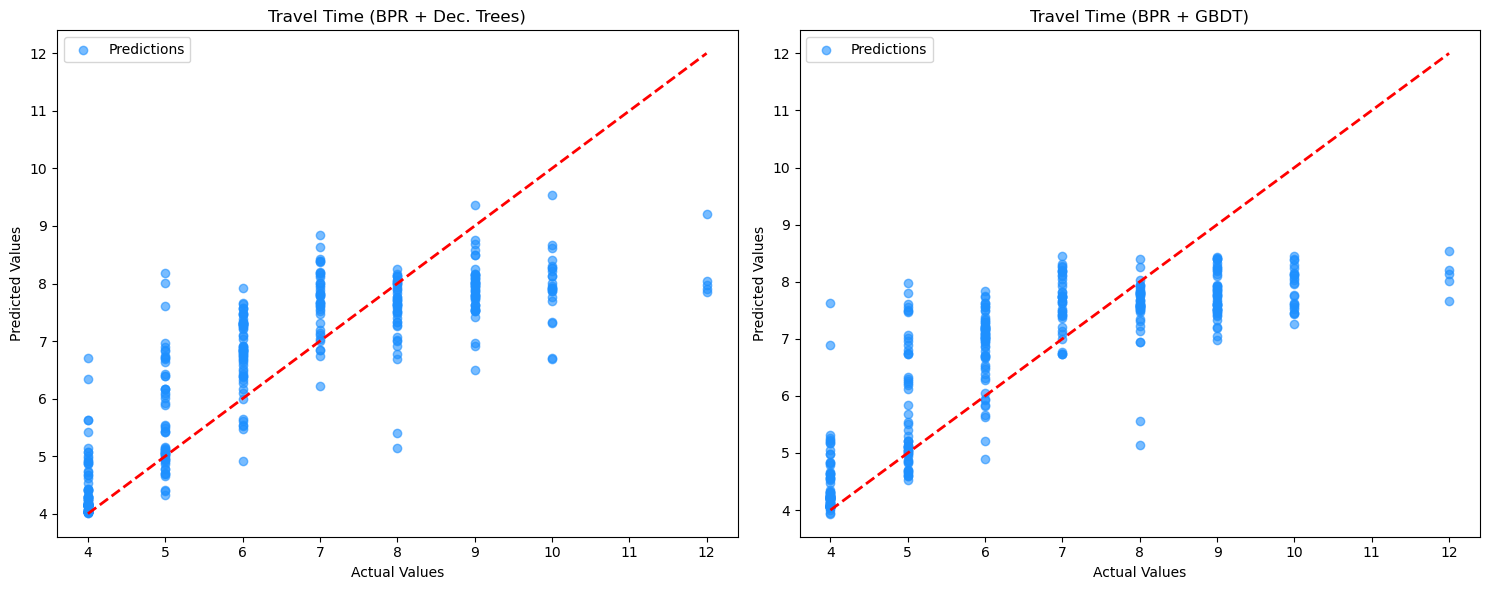

In [23]:
import matplotlib.pyplot as plt

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatterplot for combined_predictions_dt
ax1.scatter(y_test, combined_predictions_dt, color='dodgerblue', alpha=0.6, label='Predictions')
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Diagonal line
ax1.set_title('Travel Time (BPR + Dec. Trees)')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.legend()

# Scatterplot for combined_predictions_gbr
ax2.scatter(y_test, combined_predictions_gbr, color='dodgerblue', alpha=0.6, label='Predictions')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Diagonal line
ax2.set_title('Travel Time (BPR + GBDT)')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined subplots as one image
plt.savefig('combined_subplots.png')

# Show the combined subplots
plt.show()
